In [1]:
from scipy.integrate import solve_ivp
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from ode_solve import euler_integration

In [2]:

# Solution to be solved:
def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -x]


def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -np.sin(x)]

def F_eval( t, X ):
    x = X[0]
    return [t*np.sqrt(1-x**2),]

# # Stiff ode: system that describes the chemical reaction of Robertson
# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     z = X[2]
    
#     res = [
#         -0.04*x + 10**4 *y *z,
#         0.04*x - 10**4*y*z - 3*10**7 * y**2,
#         3*10**7 * y**2,
#     ]
#     return res

In [3]:
# Solution parameters
t0 = 0.
tf = 5.
# tf = 40.# <- Final time for stiff problem.
# x = -1.0, y = 2.0
# y0 =[ -1.0, 2.0]

# y0 = [1.3, 0.0]
# y0 = [1.0, 1.0, 1.0] #<- Stiff problem
y0 = [0,]

methods = [
    'RK45',
    'RK23',
    'DOP853',
    'Radau',
    'BDF',
    'LSODA'
]
nvals = 1000
dt = 1e-2
t_vec = np.arange(t0,tf,dt)

In [4]:
sol = solve_ivp(
        F_eval,
        [t0,tf],
        y0,
        t_eval = t_vec,
        rtol=1e-6,
        method=methods[0]
    )
sol

<ipython-input-2-ab4cfbc236f5>:15: RuntimeWarning: invalid value encountered in sqrt
  return [t*np.sqrt(1-x**2),]


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 662
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22,

In [57]:
%timeit sol = solve_ivp( F_eval, [t0,tf], y0, t_eval = t_vec, rtol=1e-8, method=methods[0] )

29.8 ms ± 40.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
sols = []
solsPts = []
for method in methods:
    sol = solve_ivp(
        F_eval,
        [t0,tf],
        y0,
        method=method,
        rtol = 1e-6,
    )
    sols.append(sol)
    sol = solve_ivp(
        F_eval,
        [t0,tf],
        y0,
        t_eval = t_vec,
        method=method,
        rtol = 1e-6,
    )
    solsPts.append(sol)
# end for 

<ipython-input-2-ab4cfbc236f5>:15: RuntimeWarning: invalid value encountered in sqrt
  return [t*np.sqrt(1-x**2),]


ValueError: array must not contain infs or NaNs

In [9]:
sols[0].t

array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 9.27824389e-01, 1.11751380e+00, 1.30720321e+00,
       1.45810009e+00, 1.60899698e+00, 1.66602651e+00, 1.72305604e+00,
       1.74626942e+00, 1.75091209e+00, 1.75555477e+00, 1.76484012e+00,
       1.76669719e+00, 1.76855426e+00, 1.76929708e+00, 1.77003991e+00,
       1.77152557e+00, 1.77182270e+00, 1.77211983e+00, 1.77223868e+00,
       1.77235754e+00, 1.77240508e+00, 1.77245262e+00, 1.77247163e+00,
       1.77249065e+00, 1.77252868e+00, 1.77256672e+00, 1.77258193e+00,
       1.77258497e+00, 1.77258801e+00, 1.77259410e+00, 1.77260019e+00,
       1.77260262e+00, 1.77260311e+00, 1.77260359e+00, 1.77260457e+00,
       1.77260476e+00, 1.77260496e+00, 1.77260535e+00, 1.77260542e+00,
       1.77260550e+00, 1.77260553e+00, 1.77260556e+00, 1.77260563e+00,
       1.77260569e+00, 1.77260571e+00, 1.77260572e+00, 1.77260572e+00,
       1.77260573e+00, 1.77260574e+00, 1.77260575e+00, 1.77260575e+00,
      

<IPython.core.display.Javascript object>


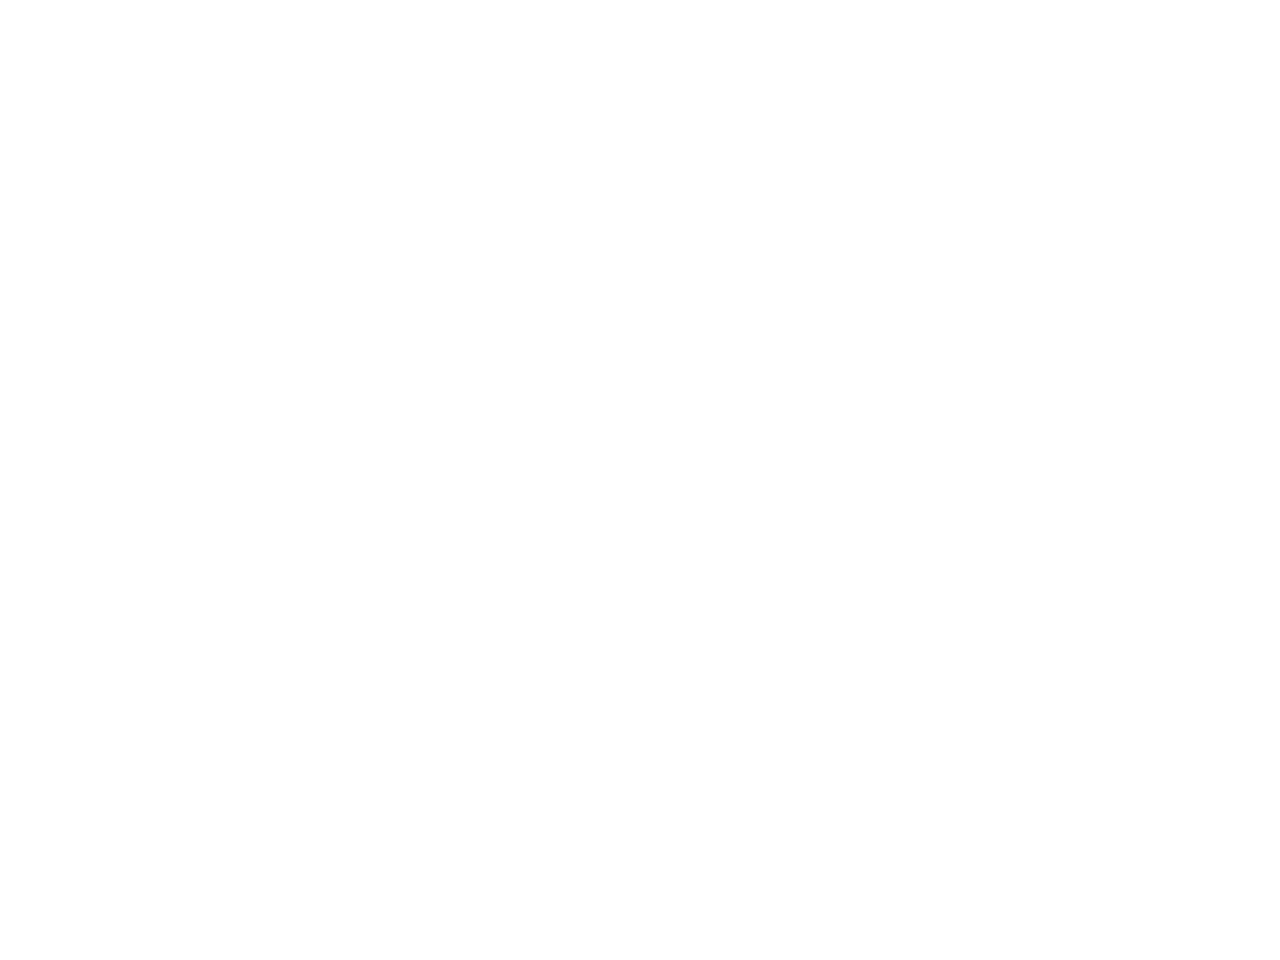

IndexError: list index out of range

In [7]:
plt.figure()

plt.plot(y0[0],y0[1],'ko')
symbols = [".","o","|","s",">","<","x"]
delt = 1.05
fact_mult = 1.0
for i in range(len(sols)):
    sol = solsPts[i]
    color = 'C%d'%(int(i))
    plt.plot(fact_mult*sol.y[0],fact_mult*sol.y[1],color,linewidth=1.5, label=methods[i])
    sol = sols[i]
    plt.plot(fact_mult*sol.y[0],fact_mult*sol.y[1],color+'.')
    # end for 1
    fact_mult *= delt
# end for

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid('on')
plt.axis('equal')
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


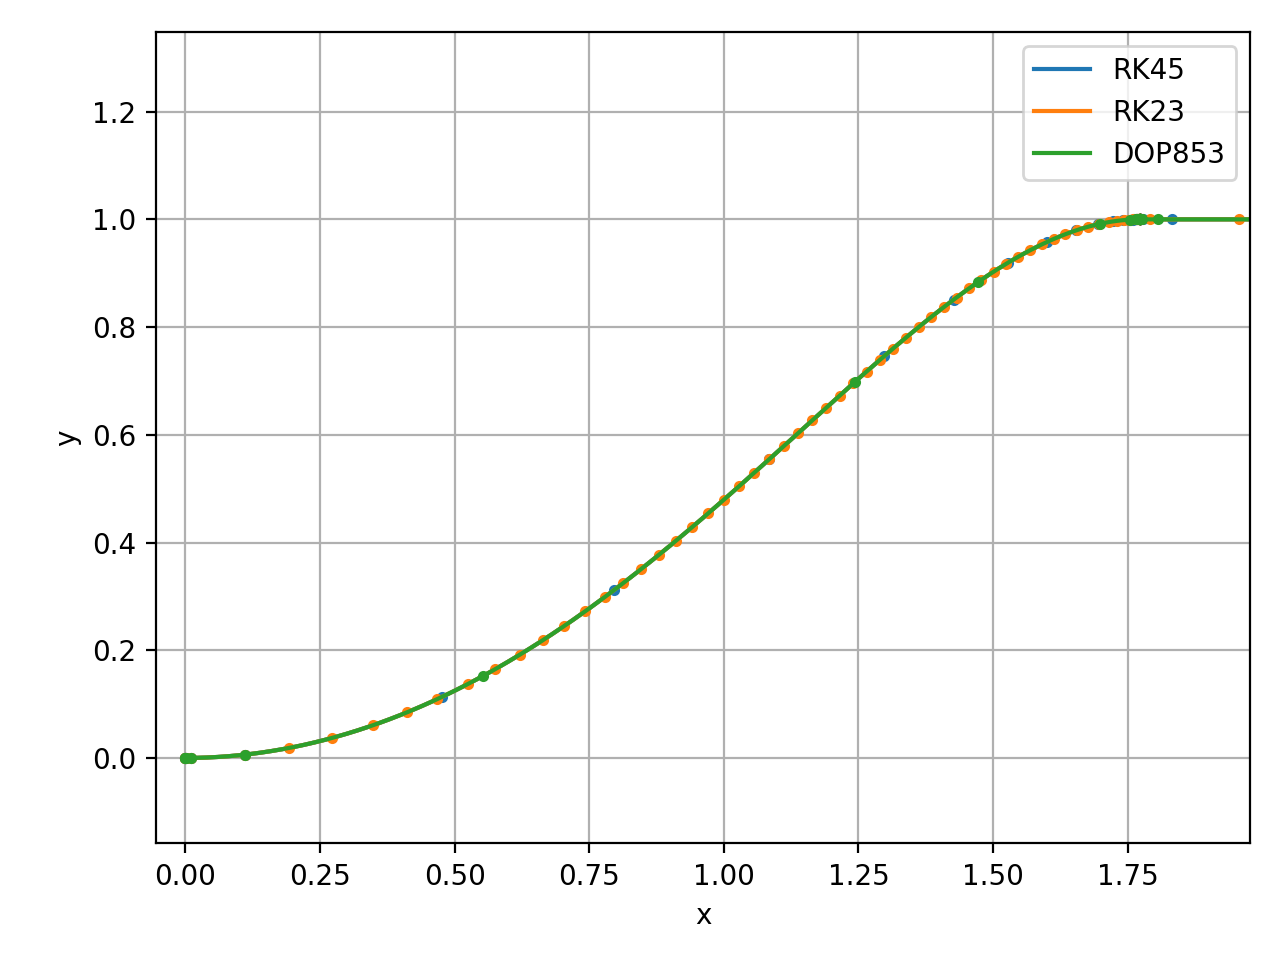

In [16]:
plt.figure()

symbols = [".","o","|","s",">","<","x"]
delt = 1.00
fact_mult = 1.0
for i in range(len(sols)):
    sol = solsPts[i]
    color = 'C%d'%(int(i))
    plt.plot(fact_mult*sol.t,fact_mult*sol.y[0],color,linewidth=1.5, label=methods[i])
    sol = sols[i]
    plt.plot(fact_mult*sol.t,fact_mult*sol.y[0],color+'.')
    # end for 1
    fact_mult *= delt
# end for

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid('on')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [43]:

dt_euler = 1e-6
x_vals_euler = euler_integration(F_eval, y0, dt_euler, tf)
slicer = int(np.ceil(dt / dt_euler))
x_vals_euler = x_vals_euler[::slicer]
x_vals_euler


array([[-1.        ,  2.        ,  0.        ],
       [-0.97995034,  2.00989984,  0.01      ],
       [-0.95980268,  2.0195987 ,  0.02      ],
       ...,
       [-2.19324443, -0.43554995,  4.98      ],
       [-2.19749021, -0.4135961 ,  4.99      ],
       [-2.20151624, -0.39160088,  5.        ]])

<IPython.core.display.Javascript object>


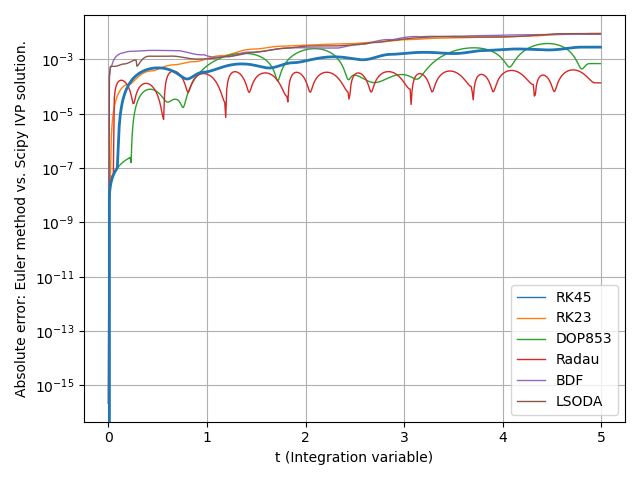

In [44]:
# Plot error values1e-6
plt.figure()

symbols = [".","o","|","s",">","<","x"]
# for i in range(1,order +1,2):
for i in range(len(sols)):

    sol = solsPts[i]
#     x_vals = x_vals_oti[i-1]
    # Subtract to euler integration to obtain the error measures.
    err = np.linalg.norm(sol.y.T - x_vals_euler[:-1,:2],axis=1)

    color = 'C%d'%(int(i))

    plt.semilogy(sol.t,err,color,linewidth=1.0, label=methods[i])
#     for j in range(len(sol)):
#         plt.semilogy([sol[j][2],sol[j][2]],[1e-9,1e-5],'k',linewidth=1.0)
        

# end for

i=0
sol = solsPts[i]
err = np.linalg.norm(sol.y.T - x_vals_euler[:-1,:2],axis=1)
color = 'C%d'%(int(i))
plt.semilogy(sol.t,err,color,linewidth=2)


plt.xlabel("t (Integration variable)")
plt.ylabel("Absolute error: Euler method vs. Scipy IVP solution.")
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.show()

In [28]:
sol.t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.